2025-06-12 19:33:44.887297: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. Wh

Scanning path: /Users/macbook/Desktop/M2/Prof M. Benaddy Deep Learning/Tp 4/Tifinagh/Dataset/train_data/ya
Found 854 images in ya
> Loaded 200 images from ya class.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


>1, 1/1, d=0.698, g=0.701
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step
>2, 1/1, d=0.698, g=0.700
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step
>3, 1/1, d=0.697, g=0.699
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step
>4, 1/1, d=0.694, g=0.700
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step
>5, 1/1, d=0.694, g=0.699
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step
>6, 1/1, d=0.695, g=0.697
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
>7, 1/1, d=0.696, g=0.696
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
>8, 1/1, d=0.696, g=0.697
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step
>9, 1/1, d=0.696, g=0.697
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step
>10, 1/1, d=0.697, g=0.697
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step
>Accuracy real: 20%, fake: 0%
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step
>11, 1/1, d=0.699, g=0.697
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step
>12, 1/1, d=0.700, g=0.696
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
>13, 1/1, d=0.700, g=0.696
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step
>14, 1/1, d=0.700, g=0.695
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step
>15, 1/1, d=0.70

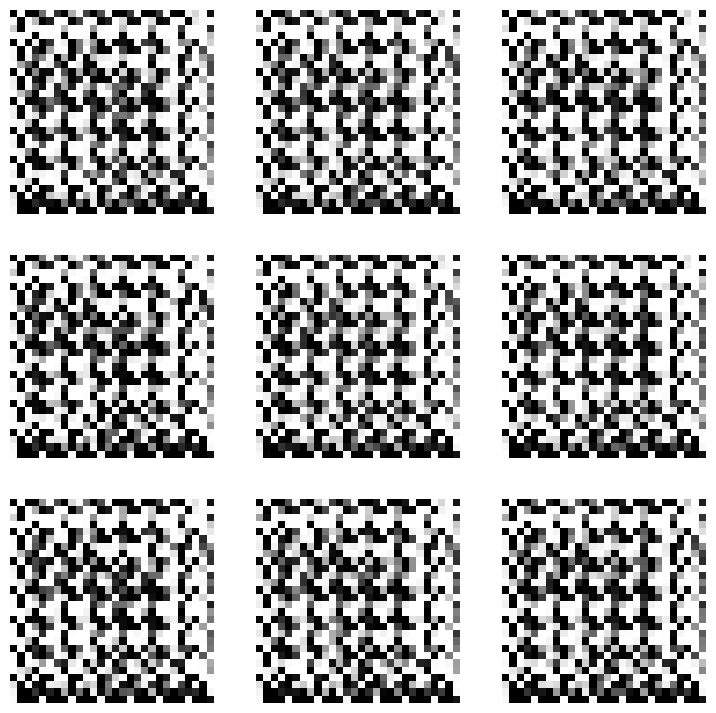

In [1]:
import os
import cv2
import numpy as np
from numpy import expand_dims, zeros, ones, vstack
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from matplotlib import pyplot as plt

"""## The libraries we will use"""

# Parameters
n_class = 1  # Number of classes (one Tifinagh letter)
n_train_Tifinagh_mnist = 200  # Number of images to load (reduced to match observed counts)
category_name = 'ya'  # Specify the Tifinagh letter category to generate (e.g., 'ya')

def upload_data_Tfinagh_MNIST(path_name, category, number_of_images):
    X_Data = []
    category_path = os.path.join(path_name, category)
    if not os.path.exists(category_path):
        print(f"Error: Category path does not exist: {category_path}")
        return np.array([])
    print(f"Scanning path: {category_path}")
    images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Found {len(images)} images in {category}")
    if images:
        images_to_use = images[:min(number_of_images, len(images))]  # Limit to available images
        for img_file in images_to_use:
            img_path = os.path.join(category_path, img_file)
            img = cv2.imread(img_path, 0)  # Load as grayscale
            if img is not None:
                # Resize image to 28x28 to match GAN input
                img_resized = cv2.resize(img, (28, 28))
                X_Data.append(img_resized)
            else:
                print(f"Failed to load image: {img_path}")
        print(f"> Loaded {len(images_to_use)} images from {category} class.")
    else:
        print(f"No images found in {category}")
    return np.array(X_Data)

def define_discriminator(in_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7, 7), activation='sigmoid', padding='same'))
    return model

def define_gan(g_model, d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

def load_real_samples():
    trainX = upload_data_Tfinagh_MNIST('/Users/macbook/Desktop/M2/Prof M. Benaddy Deep Learning/Tp 4/Tifinagh/Dataset/train_data', category_name, n_train_Tifinagh_mnist)
    if trainX.size == 0:
        print("Error: No data loaded. Check the category and path.")
        return np.array([])
    X = expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = X / 255.0
    return X

def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

def save_plot(examples, epoch, n=10):
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    filename = 'generated_plot_e%03d.png' % (epoch + 1)
    plt.savefig(filename)
    plt.close()

def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real * 100, acc_fake * 100))
    save_plot(x_fake, epoch)

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    if dataset.size == 0:
        print("Error: Dataset is empty. Training aborted.")
        return
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            d_loss, _ = d_model.train_on_batch(X, y)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i + 1, j + 1, bat_per_epo, d_loss, g_loss))
        if (i + 1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

# Size of the latent space
latent_dim = 100
# Create the discriminator
d_model = define_discriminator()
# Create the generator
g_model = define_generator(latent_dim)
# Create the gan
gan_model = define_gan(g_model, d_model)
# Load image data
dataset = load_real_samples()
# Train model
train(g_model, d_model, gan_model, dataset, latent_dim)

# Generate and plot fake samples
z = generate_latent_points(latent_dim, 9)
im = g_model.predict(z)

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(im[i, :, :, 0], cmap='gray_r')
    plt.axis('off')
plt.show()